# ML 2. Unsupervised learning - Kmeans

In [2]:
%pylab inline
import novainstrumentation as ni
import seaborn

Populating the interactive namespace from numpy and matplotlib


## Step 1
Generate data in 3 clusters using _sklearn.datasets.make_blobs_. Generate 15 samples in ${\rm I\!R^2}$,  three clusters with std 1. 

note: use the random seed = 1

In [3]:
from sklearn.datasets import make_blobs
seed(1)

n_centers = 3

X,Y=make_blobs(n_samples=15, n_features=2, centers=n_centers, cluster_std=1)

## Step 2
Plot the base data each class with a different color

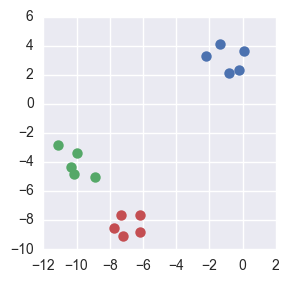

In [4]:
def plot_clusters(X,Y):

    figure(figsize=(3,3))
    for i in [0,1,2]:
        ix = (Y==i)
        plot(X[ix,0],X[ix,1],'.',ms=15)

plot_clusters(X,Y)

# Step 3
Randomly select the centroids as the first samples of the data set.

In [5]:
Centroids = X[:n_centers,:]

# Step 4
Create a function to compute the distance matrix to each centroid (dim: num of samples vs num of centrioids), using the eucledean distance (scipy.spatial.distance.euclidean)

In [6]:
from scipy.spatial.distance import euclidean

def dist(C,X):
    
    D = zeros((X.shape[0],C.shape[0]))

    for c in range(n_centers):
        for s in range(X.shape[0]):
            D[s,c] = euclidean(X[s],Centroids[c])
    return D

D = dist(Centroids,X)

D



array([[  0.        ,   1.68521836,   1.61816677],
       [  1.68521836,   0.        ,   1.01936959],
       [  1.61816677,   1.01936959,   0.        ],
       [  5.665243  ,   3.98046081,   4.43336658],
       [ 12.67542196,  12.25961461,  13.26159421],
       [  1.05431551,   1.4732775 ,   0.78360581],
       [ 12.18855521,  11.72109557,  12.72801936],
       [  1.18622243,   1.16981063,   1.8295073 ],
       [ 13.95921794,  13.49067763,  14.49890424],
       [ 12.80357115,  12.10429631,  13.12361611],
       [  6.65259651,   4.99610792,   5.6269078 ],
       [  4.64823179,   2.9912377 ,   3.66790654],
       [ 13.86045459,  13.21647714,  14.23501875],
       [  7.79025971,   6.11199106,   6.64309641],
       [  6.12528969,   4.44056616,   4.93130781]])

# Step 5 
Iterate on selecting

1. Find the nearest centroid for each sample
2. Compute the new centroids
3. Assing new centroids for each sample.
4. if 1 and 3 are equal stop.

[0 0 0 2 1 0 1 0 1 1 2 2 1 2 2]
[2 2 2 1 0 2 0 2 0 0 1 1 0 1 1]


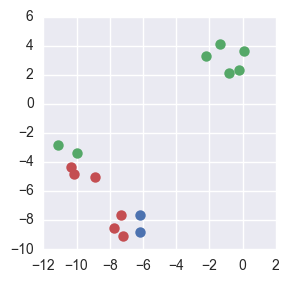

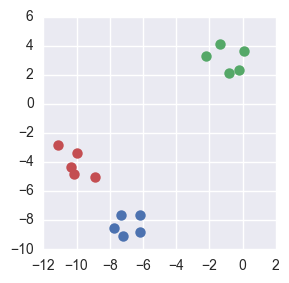

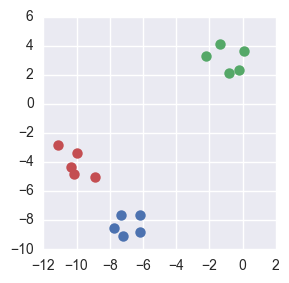

In [7]:
Y_est = argmin(D,1)

def compute_centroids(X,Y):
    C = zeros((3,X.shape[1]))
    for i in [0,1,2]:
        
        C[i,:] = mean(X[Y==i,:],0)
    return C
        

for i in range(4):
    Centroids = compute_centroids(X,Y_est)
    D = dist(Centroids,X)
    Y_old = Y_est
    Y_est = argmin(D,1)
    plot_clusters(X,Y_est)
    if all(Y_est==Y_old):
        break

print Y_est
print Y



# Step 6
Estimate the error with sklearn.metrics.adjusted_rand_score

In [19]:
from sklearn import metrics

print metrics.adjusted_rand_score(Y,Y_est)

1.0
